In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

from ebv import get_SFD_dust
from util import inside_poly, mkpol, angular_separation
from scipy import interpolate


/Users/users/spirov/conf/


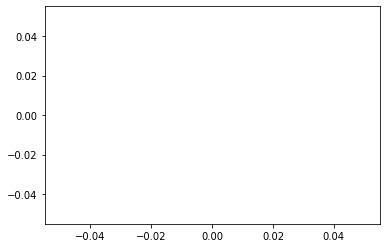

In [2]:
plt.plot()
font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.show()

In [3]:
zeroPoints = [-25.469,-26.129,-26.6927,-27.1987,-27.7094,-26.1856,-26.2275,-25.7455,-25.3574,-25.307,-25.5899,-25.8546,-25.8957,-26.0972,-26.8835,-26.9708,-27.1138,-27.4518,-27.6065,-27.8344]

"""
-25.469 C1B431   0
-26.129 C1B556   1
-26.6927 C1B655  2
-27.1987 C1B768  3
-27.7094 C1B916  4
-26.1856 C1M326  5
-26.2275 C1M344  6
-25.7455 C1M379  7
-25.3574 C1M395  8
-25.307 C1M410   9
-25.5899 C1M467  10
-25.8546 C1M506  11
-25.8957 C1M515  12
-26.0972 C1M549  13
-26.8835 C1M656  14
-26.9708 C1M716  15
-27.1138 C1M747  16
-27.4518 C1M825  17
-27.6065 C1M861  18
-27.8344 C1M965  19
"""

def getMagCustomFilter(ColorArray,zeropoints):
    Ns = []
    
    for i in range(len(ColorArray)):
        ci = ColorArray[i]
        pi = zeropoints[i]
        
        ni = ci/(10**(pi/2.5))
        Ns.append(ni)
    s = np.sum(Ns)
   
    mymag = -2.5*np.log10(s)
    
    return mymag
    

In [4]:
ddir = "/net/gaia2/data/users/gaia/andrae_xgboost/dr3/"
xgdf = vaex.open(ddir+'table1.hdf5')


gdir = "/net/gaia2/data/users/gaia/gaia-dr3/"

dataFrame = vaex.open( gdir+ "gaia-dr3.hdf5")
dataFrame.join(
    vaex.open(
       gdir+ "gaia-dr3.d/xp_spec.hdf5"
    ),
    inplace=True,
)



#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,...,Gaia2_mag_C1M656,Gaia2_mag_C1M716,Gaia2_mag_C1M747,Gaia2_mag_C1M825,Gaia2_mag_C1M861,Gaia2_mag_C1M965,Gaia2_flux_C1B431,Gaia2_flux_C1B556,Gaia2_flux_C1B655,Gaia2_flux_C1B768,Gaia2_flux_C1B916,Gaia2_flux_C1M326,Gaia2_flux_C1M344,Gaia2_flux_C1M379,Gaia2_flux_C1M395,Gaia2_flux_C1M410,Gaia2_flux_C1M467,Gaia2_flux_C1M506,Gaia2_flux_C1M515,Gaia2_flux_C1M549,Gaia2_flux_C1M656,Gaia2_flux_C1M716,Gaia2_flux_C1M747,Gaia2_flux_C1M825,Gaia2_flux_C1M861,Gaia2_flux_C1M965,Gaia2_flux_error_C1B431,Gaia2_flux_error_C1B556,Gaia2_flux_error_C1B655,Gaia2_flux_error_C1B768,Gaia2_flux_error_C1B916,Gaia2_flux_error_C1M326,Gaia2_flux_error_C1M344,Gaia2_flux_error_C1M379,Gaia2_flux_error_C1M395,Gaia2_flux_error_C1M410,Gaia2_flux_error_C1M467,Gaia2_flux_error_C1M506,Gaia2_flux_error_C1M515,Gaia2_flux_error_C1M549,Gaia2_flux_error_C1M656,Gaia2_flux_error_C1M716,Gaia2_flux_error_C1M747,Gaia2_flux_error_C1M825,Gaia2_flux_error_C1M861,Gaia2_flux_error_C1M965,Jkc_mag_U,Jkc_mag_B,Jkc_mag_V,Jkc_mag_R,Jkc_mag_I,Jkc_flux_U,Jkc_flux_B,Jkc_flux_V,Jkc_flux_R,Jkc_flux_I,Jkc_flux_error_U,Jkc_flux_error_B,Jkc_flux_error_V,Jkc_flux_error_R,Jkc_flux_error_I,JkcStd_mag_U,JkcStd_mag_B,JkcStd_mag_V,JkcStd_mag_R,JkcStd_mag_I,JkcStd_flux_U,JkcStd_flux_B,JkcStd_flux_V,JkcStd_flux_R,JkcStd_flux_I,JkcStd_flux_error_U,JkcStd_flux_error_B,JkcStd_flux_error_V,JkcStd_flux_error_R,JkcStd_flux_error_I,Pristine_mag_CaHK,Pristine_flux_CaHK,Pristine_flux_error_CaHK,Stromgren_mag_u,Stromgren_mag_v,Stromgren_mag_b,Stromgren_mag_y,Stromgren_flux_u,Stromgren_flux_v,Stromgren_flux_b,Stromgren_flux_y,Stromgren_flux_error_u,Stromgren_flux_error_v,Stromgren_flux_error_b,Stromgren_flux_error_y,StromgrenStd_mag_v,StromgrenStd_mag_b,StromgrenStd_mag_y,StromgrenStd_flux_v,StromgrenStd_flux_b,StromgrenStd_flux_y,StromgrenStd_flux_error_v,StromgrenStd_flux_error_b,StromgrenStd_flux_error_y
0,1636148068921376768,Gaia DR3 4295806720,4295806720,545300884,2016.0,44.99615537864534,0.10161827,0.0056152263418659,0.10133387,0.3543305595550248,0.12266381,2.8886316,12.616485,11.93835156938502,0.13794228,-4.080619339413087,0.13316983,0.12293493,0.13202813,-0.088910

In [5]:
dirr = "/Users/users/spirov/ClusterProject/GC_membership/data/"
name = "NGC_6752"
sam = vaex.open(dirr+name+".hdf5")


sampl = sam[sam["memberprob"]>0.85]
members = dataFrame['source_id'].isin(sampl['source_id'].values)

mdir = "/Users/users/spirov/ClusterProject/"

standardsApogee = vaex.from_csv(mdir+"J_MNRAS_492_1641_Gaia_EDR3 (1)")



In [6]:
sigmaGBP_0 = 0.0027901700
sigmaGRP_0 = 0.0037793818

FGBP = dataFrame.phot_bp_mean_flux
e_FGBP = dataFrame.phot_bp_mean_flux_error
FGRP = dataFrame.phot_rp_mean_flux
e_FGRP = dataFrame.phot_rp_mean_flux_error

e_bp = np.sqrt(((-2.5/np.log(10))*(e_FGBP/FGBP))**2 + sigmaGBP_0**2)
e_rp = np.sqrt(((-2.5/np.log(10))*(e_FGRP/FGRP))**2 + sigmaGRP_0**2)

ebp_rp = np.sqrt(e_bp**2 + e_rp**2) 

dataFrame["ebp_rp"] = ebp_rp

clusterFrame = dataFrame[members]

#lusterFrame.join(standardsApogee,on="source_id",lprefix="og")

In [7]:
bprp = clusterFrame.bp_rp.values
ebprp = clusterFrame.ebp_rp.values
mG = clusterFrame.phot_g_mean_mag.values


centr = np.array([287.717102, -59.984554])
R = np.sqrt( (clusterFrame.ra-centr[0])**2 + (clusterFrame.dec-centr[1])**2 )
clusterFrame["offcenter"] = R
Rs = clusterFrame.offcenter.values

# CREATING COLOR

In [8]:
a = 0.5
b = 18
cut = np.union1d(np.where(bprp>a), np.where(mG>b))

dCut = np.where(np.log(Rs)>-2)[0]
fCut = np.intersect1d(cut,dCut)

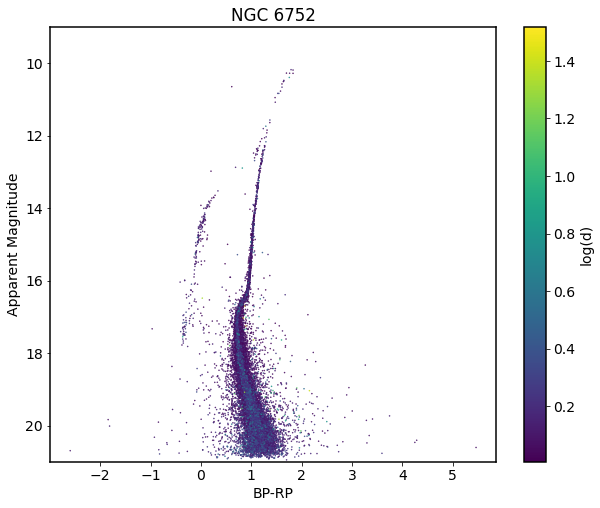

In [34]:
plt.figure(figsize=(10,8))
xWidth = 7
plt.scatter(bprp, mG, c = Rs,s=1,marker=".")
plt.title("NGC 6752")
plt.ylim(21, 9)
plt.xlabel("BP-RP")
plt.ylabel("Apparent Magnitude")
cbt= plt.colorbar()
cbt.set_label("log(d)")
plt.show()

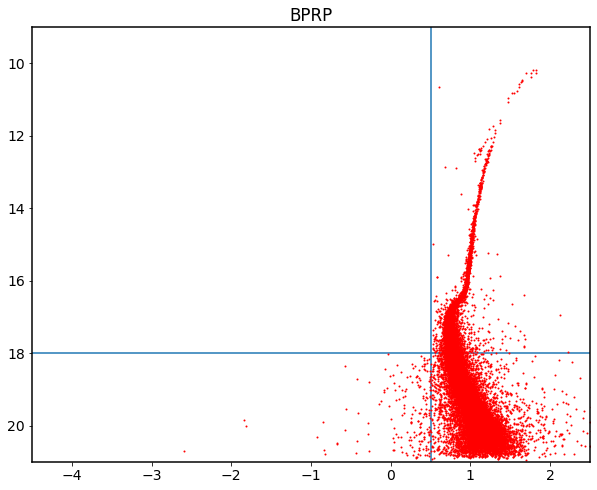

In [9]:
plt.figure(figsize=(10,8))
plt.axhline(b)
xWidth = 7
plt.axvline(a)
plt.plot(bprp[cut], mG[cut], 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")
plt.ylim(21, 9)
plt.axhline()
plt.show()

JKC


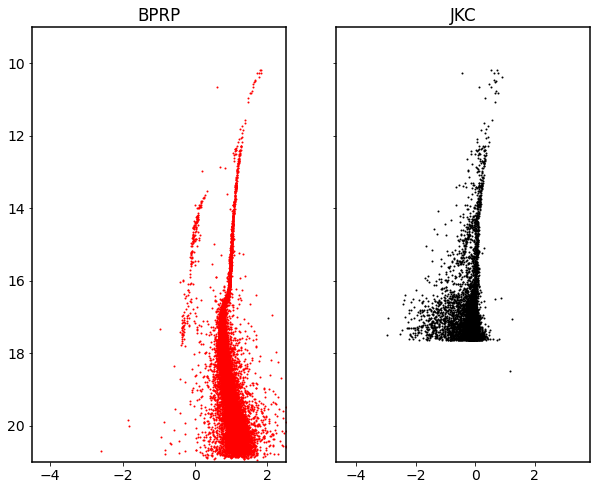

In [10]:
print("JKC")

mG = clusterFrame.phot_g_mean_mag.values

mag = clusterFrame.Jkc_mag_U-clusterFrame.Jkc_mag_B

MPivot = clusterFrame.Jkc_mag_B-clusterFrame.Jkc_mag_I
myCol = mag#-MPivot

bprp = clusterFrame.bp_rp.values
Rs = clusterFrame.offcenter.values

clusterFrame["JKC"] = myCol

color =  clusterFrame.JKC.values
xWidth = 7

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121)
plt.plot(bprp, mG, 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")

ax2 = plt.subplot(122, sharey=ax1)
aa = plt.plot(color, mG, 'ko', ms=1)
plt.tick_params('y', labelleft=False)
plt.title("JKC")
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth)

plt.ylim(21, 9)
#plt.suptitle("NGC 6656")

plt.show()


name = "JKB, C_UBI"

# STANDARD PROCEDURE

skip


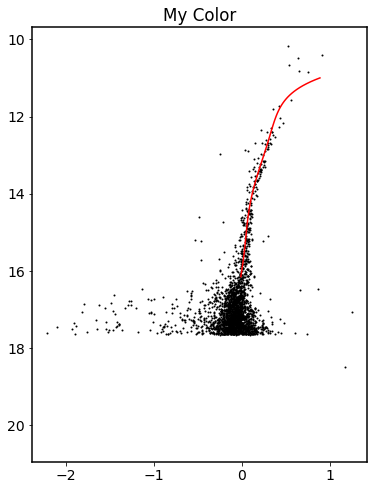

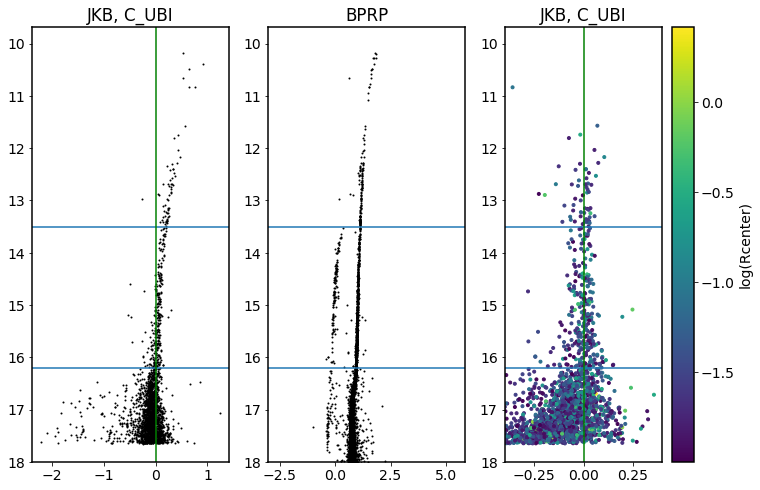

In [11]:
H = fCut
col = color[H]

point = 16.2
p2 =13.5


bot = 11#11.7
obprp=np.copy(bprp)
nG = clusterFrame.phot_g_mean_mag.values[H]

bins = np.linspace(bot, point+0.1, 15)

bc =[]
mu=[]
sig=[]
isig=[]

for xmin, xmax in zip(bins[:-1], bins[1:]):
    cen = (xmax + xmin)/2
    j = (nG < xmax)*(nG >= xmin)

    if len(np.where(j==True)[0]) ==0:
        print("skip")
        continue

    cs = col[j]
    cs = cs[~np.isnan(cs)]
    mc = np.median(cs)
    std = np.std(cs)
    bc.append(cen)
    mu.append(mc)
    sig.append(std)
    
p = np.polyfit(bc,mu, 7)
f = lambda x: np.polyval(p,x)
#    f = interpolate.interp1d(bc, mu, kind='cubic', bounds_error=False, fill_value=(mu[0], mu[-1]))


plt.figure(figsize=(6,8))
plt.plot(col, nG, 'ko', ms=1)

X = np.arange(bot, point, 0.05)
plt.plot(f(X),X,'r-')

plt.ylim(max(nG), min(nG)-0.5)
plt.title("My Color")
plt.show()

#'''

##################################################################################



clensedCol = col[~np.isnan(col)]
cleansedMG = nG[~np.isnan(col)]

zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

MG = cleansedMG
NC = clensedCol - f(MG)
cleansedR = Rs[H][~np.isnan(col)]



plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
plt.plot(clensedCol, cleansedMG, 'ko', ms=1)

#  plt.scatter(mu,bc,c='r',marker="+")


plt.ylim(18, min(mG)-0.5)
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')

ax2 = plt.subplot(132,sharey=ax1)
plt.plot(bprp, mG, 'ko', ms=1)

plt.ylim(18, min(mG)-0.5)
plt.title("BPRP")
plt.axhline(point)
plt.axhline(p2)

#  plt.scatter(mu,bc,c='r',marker="+")


ax2 = plt.subplot(133,sharey=ax1)

plt.scatter(NC, MG, marker=".",c=np.log(cleansedR))

plt.ylim(18, min(nG)-0.5)
plt.xlim(-0.4,.4)
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')
cb = plt.colorbar()
cb.set_label("log(Rcenter)")


#    plt.scatter(mu,bc,c='r',marker="+")

N=NC[zone]

plt.show()

    

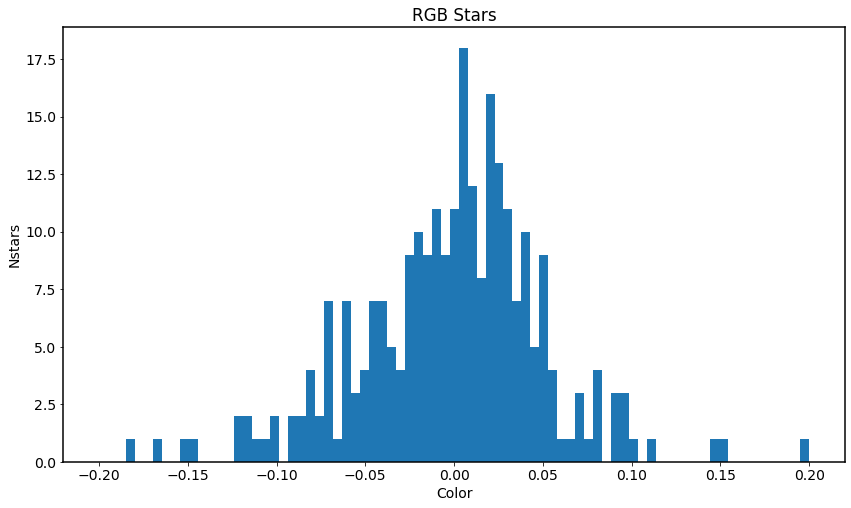

In [12]:
r= 0.2
bs = np.linspace(-r,r,80)

plt.figure(figsize=(14,8))

plt.hist(N,bs)

plt.title("RGB Stars")



plt.xlabel("Color")
plt.ylabel("Nstars")
plt.show()

In [13]:
Mgs = standardsApogee["[Mg/Fe]"].values #standardsApogee
Als = standardsApogee["[Al/Fe]"].values

S = np.logical_and(np.isnan(Mgs), np.isnan(Als))

Mgs = Mgs[~S]
Als = Als[~S]

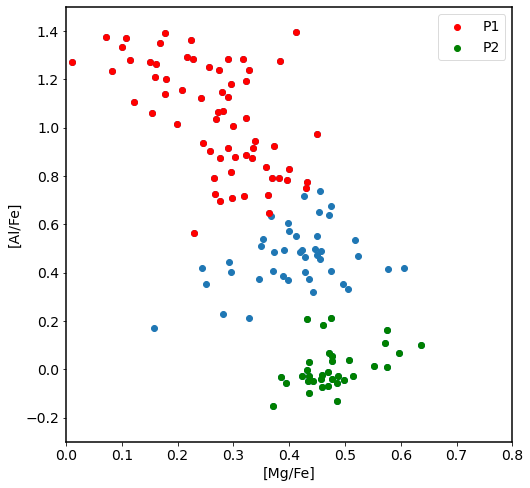

In [38]:
def selfunc(x,angl, minx=0,miny=0):
    m=np.tan(np.deg2rad(angl))
    return (x-minx)*m -miny
    
plt.figure(figsize=(8,8))
plt.scatter(Mgs,Als)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[Al/Fe]")


angle = 60



p1 = np.where(selfunc(Mgs,angle)<Als)
plt.scatter(Mgs[p1],Als[p1],c='r',label="P1")

p2 = np.where(selfunc(Mgs,90-angle)>Als)
plt.scatter(Mgs[p2],Als[p2],c='g', label = "P2")




Xs = np.linspace(0,0.8,60)
Ys = selfunc(Xs,angle)

#plt.plot(Xs,Ys)

plt.xlim(0,0.8)
plt.ylim(-0.3,1.5)
plt.legend()
plt.show()

In [15]:
Gai1 = standardsApogee["source_id"].values[p1]
Gai2 = standardsApogee["source_id"].values[p2]

P1 = clusterFrame['source_id'].isin(Gai1).values
P2 = clusterFrame['source_id'].isin(Gai2).values


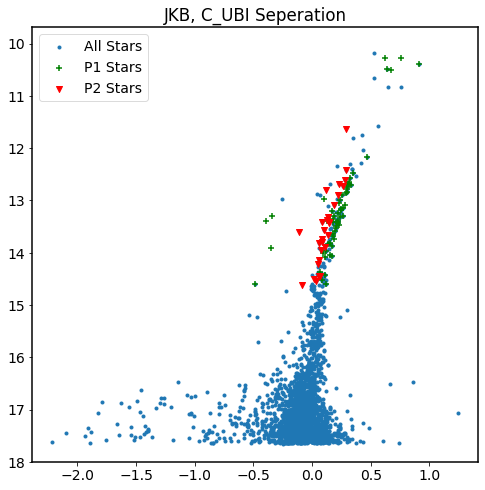

In [45]:
p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]



plt.figure(figsize=(8,8))


plt.scatter(clensedCol, cleansedMG, marker=".",label="All Stars")

plt.scatter(p1C,p1m,c='g',marker="+",label="P1 Stars")
plt.scatter(p2C,p2m,c='r',marker="v",label="P2 Stars")


plt.title(f"{name} Seperation")
plt.legend()
plt.ylim(18, min(nG)-0.5)
#plt.xlim(-0.4,.4)
plt.show()



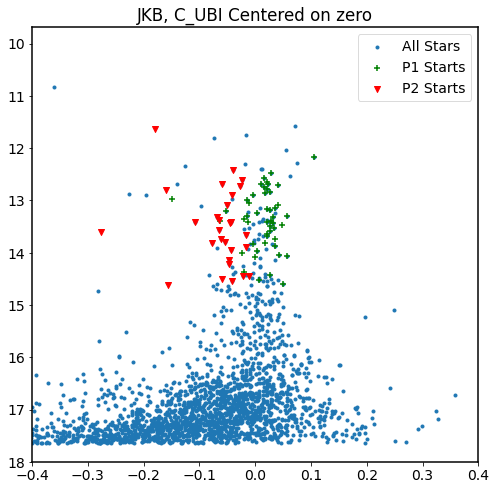

In [49]:
p1C = color[P1]
p2C = color[P2]
mg = clusterFrame.phot_g_mean_mag.values
p1m = mg[P1]
p2m = mg[P2]

p1zC = color[P1] - f(p1m)
p2zC = color[P2] - f(p2m)



plt.figure(figsize=(8,8))


plt.scatter(NC, MG, marker=".",label="All Stars")

plt.scatter(p1zC,p1m,c='g',marker="+",label="P1 Starts")
plt.scatter(p2zC,p2m,c='r',marker="v",label="P2 Starts")

plt.title(f"{name} Centered on zero")
plt.legend()
plt.ylim(18, min(nG)-0.5)
plt.xlim(-0.4,.4)

plt.show()



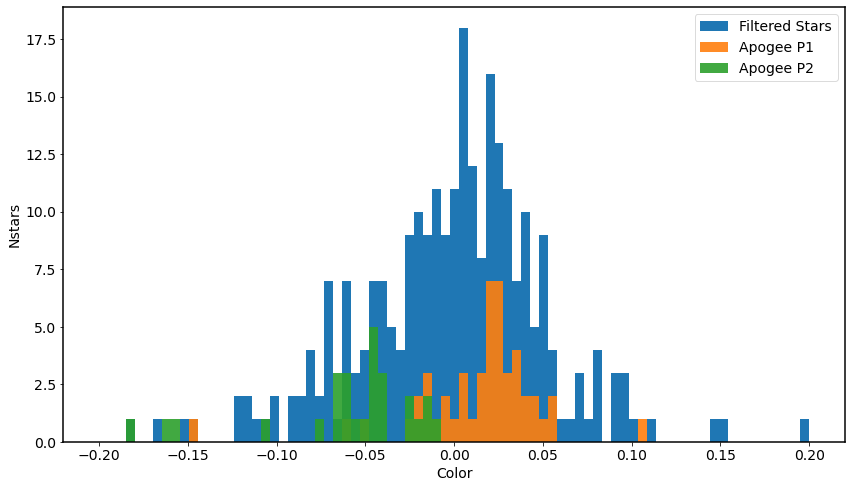

In [47]:
r= 0.2
bs = np.linspace(-r,r,80)
plt.figure(figsize=(14,8))



plt.hist(N,bs,label="Filtered Stars")
plt.hist(p1zC,bs,label="Apogee P1",alpha=0.9)
plt.hist(p2zC,bs,label="Apogee P2",alpha=0.9)

#plt.title(f"U-B Stars")

plt.legend()

plt.xlabel("Color")
plt.ylabel("Nstars")
plt.show()